## 🧠💡 Intelligent Systems  for Smart Health 👨‍⚕👩‍⚕️

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img

from sklearn.utils import shuffle
import cv2

2023-06-23 13:56:47.313783: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-23 13:56:48.166764: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/compilers_and_libraries_2018.1.163/linux/tbb/lib/intel64_lin/gcc4.7:/opt/intel/compilers_and_libraries_2018.1.163/linux/compiler/lib/intel64_lin:/opt/intel/compilers_and_libraries_2018.1.163/linux/mkl/lib/intel64_lin::/usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64/
2023-06-23 13:56:48.166904: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not

## 1. Exploration

Read the data from `csv` files.

In [2]:
!pip install xlrd

In [3]:
#!pip3 install openpyxl

In [4]:
path_data = "COVID19_radiography_dataset/"

metadata_df = pd.read_excel(os.path.join(path_data, "COVID.metadata.xlsx"), engine='openpyxl')
metadata_df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [5]:
# Paths to images
covid_image_path = os.path.join(path_data, 'COVID/images/')
normal_image_path = os.path.join(path_data, 'Normal/images/')
pneumonia_image_path = os.path.join(path_data, 'Viral Pneumonia/images/')
lung_opacity_image_path = os.path.join(path_data, 'Lung_Opacity/images/')


# Paths to masks
covid_mask_path = os.path.join(path_data, 'COVID/masks/')
normal_mask_path = os.path.join(path_data, 'Normal/masks/')
pneumonia_mask_path = os.path.join(path_data, 'Viral Pneumonia/masks/')
lung_opacity_mask_path = os.path.join(path_data, 'Lung_Opacity/masks/')


# All paths to images and masks
all_image_paths = [[covid_image_path+file for file in os.listdir(covid_image_path)]
                   +[normal_image_path+file for file in os.listdir(normal_image_path)]
                   +[pneumonia_image_path+file for file in os.listdir(pneumonia_image_path)]
                   +[lung_opacity_image_path+file for file in os.listdir(lung_opacity_image_path)]
                  ][0]
all_mask_paths = [[covid_mask_path+file for file in os.listdir(covid_mask_path)]
                  +[normal_mask_path+file for file in os.listdir(normal_mask_path)]
                  +[pneumonia_mask_path+file for file in os.listdir(pneumonia_mask_path)]
                  +[lung_opacity_mask_path+file for file in os.listdir(lung_opacity_mask_path)]
                 ][0]

In [6]:
all_mask_paths[:20]

['COVID19_radiography_dataset/COVID/masks/COVID-522.png',
 'COVID19_radiography_dataset/COVID/masks/COVID-2992.png',
 'COVID19_radiography_dataset/COVID/masks/COVID-465.png',
 'COVID19_radiography_dataset/COVID/masks/COVID-819.png',
 'COVID19_radiography_dataset/COVID/masks/COVID-3270.png',
 'COVID19_radiography_dataset/COVID/masks/COVID-2451.png',
 'COVID19_radiography_dataset/COVID/masks/COVID-673.png',
 'COVID19_radiography_dataset/COVID/masks/COVID-1707.png',
 'COVID19_radiography_dataset/COVID/masks/COVID-3349.png',
 'COVID19_radiography_dataset/COVID/masks/COVID-1872.png',
 'COVID19_radiography_dataset/COVID/masks/COVID-417.png',
 'COVID19_radiography_dataset/COVID/masks/COVID-66.png',
 'COVID19_radiography_dataset/COVID/masks/COVID-2013.png',
 'COVID19_radiography_dataset/COVID/masks/COVID-2564.png',
 'COVID19_radiography_dataset/COVID/masks/COVID-3279.png',
 'COVID19_radiography_dataset/COVID/masks/COVID-1712.png',
 'COVID19_radiography_dataset/COVID/masks/COVID-1236.png',
 'CO

In [7]:
import random

# Shuffle the arrays
random.Random(0).shuffle(all_image_paths)
random.Random(0).shuffle(all_mask_paths)

In [8]:
#check
all_mask_paths[:5], all_image_paths[:5]

(['COVID19_radiography_dataset/Viral Pneumonia/masks/Viral Pneumonia-1200.png',
  'COVID19_radiography_dataset/COVID/masks/COVID-908.png',
  'COVID19_radiography_dataset/Normal/masks/Normal-6991.png',
  'COVID19_radiography_dataset/Lung_Opacity/masks/Lung_Opacity-1161.png',
  'COVID19_radiography_dataset/Normal/masks/Normal-3495.png'],
 ['COVID19_radiography_dataset/Viral Pneumonia/images/Viral Pneumonia-1200.png',
  'COVID19_radiography_dataset/COVID/images/COVID-908.png',
  'COVID19_radiography_dataset/Normal/images/Normal-6991.png',
  'COVID19_radiography_dataset/Lung_Opacity/images/Lung_Opacity-1161.png',
  'COVID19_radiography_dataset/Normal/images/Normal-3495.png'])

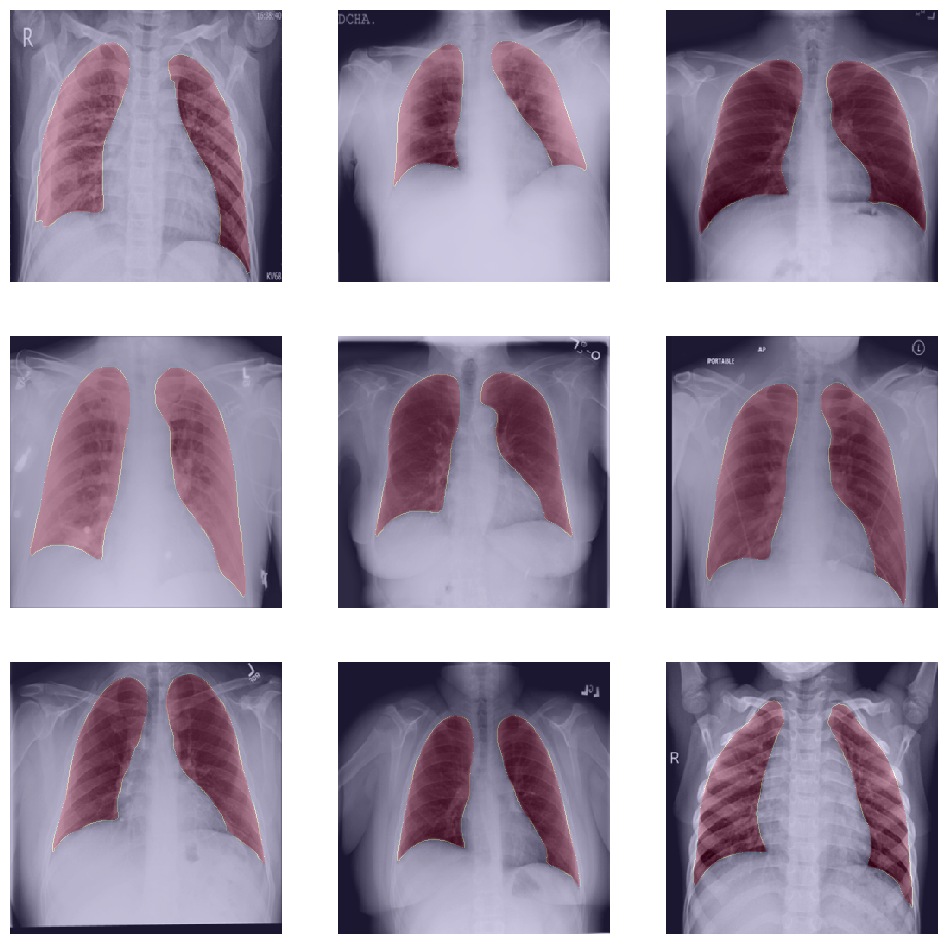

In [16]:
def open_images(paths):
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        image = np.mean(image, axis=-1)/255.0
        images.append(image)
    return np.array(images)


fig = plt.figure(figsize=(12, 12))
c = 3
r = 3
for i in range(1, c*r +1):
    fig.add_subplot(r, c, i)
    plt.axis('off')
    plt.imshow(open_images([all_image_paths[i-1]])[0], cmap='gray', interpolation='none')
    plt.imshow(open_images([all_mask_paths[i-1]])[0], cmap='Spectral_r', alpha=0.3)
plt.show()

## Build a simple data generator

In [10]:
train_image_paths = all_image_paths[:17000]
train_mask_paths = all_mask_paths[:17000]
val_image_paths = all_image_paths[17000:]
val_mask_paths = all_mask_paths[17000:]

def datagen(image_paths, mask_paths, batch_size=16):
    """Our own simple image data generator"""
    for x in range(0, len(image_paths), batch_size):
        images = open_images(image_paths[x:x+batch_size]).reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
        masks = open_images(mask_paths[x:x+batch_size]).reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
        yield images, masks

## Build a U-net architecture

In [11]:
IMAGE_SIZE = 256

In [12]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Concatenate, UpSampling2D

img_input = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))

x1 = Conv2D(64, (3,3), activation='relu', padding='same')(img_input)
x1 = Conv2D(64, (3,3), activation='relu', padding='same')(x1)
x1_pool = MaxPooling2D((2,2))(x1)

x2 = Conv2D(128, (3,3), activation='relu', padding='same')(x1_pool)
x2 = Conv2D(128, (3,3), activation='relu', padding='same')(x2)
x2_pool = MaxPooling2D((2,2))(x2)

x3 = Conv2D(256, (3,3), activation='relu', padding='same')(x2_pool)
x3 = Conv2D(256, (3,3), activation='relu', padding='same')(x3)
x3 = Conv2D(256, (3,3), activation='relu', padding='same')(x3)
x3_pool = MaxPooling2D((2,2))(x3)

x4 = Conv2D(256, (3,3), activation='relu', padding='same')(x3_pool)
x4 = Conv2D(256, (3,3), activation='relu', padding='same')(x4)
x4 = Conv2D(256, (3,3), activation='relu', padding='same')(x4)
x4_pool = UpSampling2D((2,2))(x4)

x5 = Concatenate()([x4_pool, x3]) #skip connection
x5 = Conv2D(128, (3,3), activation='relu', padding='same')(x5)
x5 = Conv2D(128, (3,3), activation='relu', padding='same')(x5)
x5_pool = UpSampling2D((2,2))(x5)

x6 = Concatenate()([x5_pool, x2]) #skip connection
x6 = Conv2D(64, (3,3), activation='relu', padding='same')(x6)
x6 = Conv2D(64, (3,3), activation='relu', padding='same')(x6)
x6_pool = UpSampling2D((2,2))(x6)

x7 = Concatenate()([x6_pool, x1]) #skip connection
x7 = Conv2D(64, (3,3), activation='relu', padding='same')(x7)
x7 = Conv2D(64, (3,3), activation='relu', padding='same')(x7)

img_output = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x7) #


model = Model(img_input, img_output)

2023-06-23 13:57:00.155799: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-23 13:57:00.750637: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 136 MB memory:  -> device: 0, name: Tesla K80, pci bus id: 0001:00:00.0, compute capability: 3.7


In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [14]:
#!pip install pydot

In [17]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [18]:
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam

def iou_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
    union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
    iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
    return iou

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=["accuracy", iou_coef])

In [19]:
batch_size = 3

# Instantiate data generators
train_gen = datagen(
    train_image_paths, train_mask_paths, batch_size
)

val_gen = datagen(
    val_image_paths, val_mask_paths, batch_size
)

In [20]:
filename = "unet_lungs_01.hdf5"
callbacks = [
    keras.callbacks.ModelCheckpoint(filename, save_best_only=True)
]

# Train the model, doing validation at the end of each epoch.
epochs = 15

num_steps = int(len(train_image_paths)/batch_size)

model.fit(train_gen,
          epochs=epochs,
          steps_per_epoch=num_steps,
          validation_data=val_gen,
          verbose=1,
          callbacks=callbacks)

Epoch 1/15


2023-06-23 13:57:27.950946: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 64.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-06-23 13:57:27.950988: W tensorflow/core/kernels/gpu_utils.cc:50] Failed to allocate memory for convolution redzone checking; skipping this check. This is benign and only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.
2023-06-23 13:57:27.972228: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:433] Could not create cudnn handle: CUDNN_STATUS_INTERNAL_ERROR
2023-06-23 13:57:27.972282: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at conv_ops_fused_impl.h:621 : UNIMPLEMENTED: DNN library is not found.


UnimplementedError: Graph execution error:

Detected at node 'model/conv2d/Relu' defined at (most recent call last):
    File "/anaconda/envs/py38_default/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/anaconda/envs/py38_default/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/anaconda/envs/py38_default/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/anaconda/envs/py38_default/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/anaconda/envs/py38_default/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_143779/1796326160.py", line 11, in <module>
      model.fit(train_gen,
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/keras/engine/training.py", line 1023, in train_step
      y_pred = self(x, training=True)
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/keras/layers/convolutional/base_conv.py", line 314, in call
      return self.activation(outputs)
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/anaconda/envs/py38_default/lib/python3.8/site-packages/keras/backend.py", line 5369, in relu
      x = tf.nn.relu(x)
Node: 'model/conv2d/Relu'
DNN library is not found.
	 [[{{node model/conv2d/Relu}}]] [Op:__inference_train_function_3923]

In [ ]:
def predict_mask(images):
    pred = model.predict(images)
    pred[pred>=0.5] = 1
    pred[pred<0.5] = 0
    return pred

In [ ]:
NO_OF_SAMPLES = 5

c = 2
r = NO_OF_SAMPLES
fig = plt.figure(figsize=(8, r*4))
for i in range(1, c*r +1, 2):
    
    image = open_images([val_image_paths[i-1]]).reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
    mask = open_images([val_mask_paths[i-1]]).reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
    pred = predict_mask(image)
    
    fig.add_subplot(r, c, i)
    plt.axis('off')
    plt.title('Actual')
    plt.imshow(image[0], cmap='gray', interpolation='none')
    plt.imshow(mask[0], cmap='Spectral_r', alpha=0.3)
    
    fig.add_subplot(r, c, i+1)
    plt.axis('off')
    plt.title('Predicted')
    plt.imshow(image[0], cmap='gray', interpolation='none')
    plt.imshow(pred[0], cmap='Spectral_r', alpha=0.3)
    
plt.show()